<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Análisis de Componentes Principales: PCA</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

<font color=red size=4>**Utilizaremos el Modulo *sklearn* que es muy utilizado en modelamiento y machine learning**

In [1]:
#Cargamos las librerias que vamos a requeririr para hacer el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing

**<font size=4 color=blue>Vamos a desarrollar un script para hacer Análisis de Componentes Principales (PCA) y para ello utilizaremos los datos de espectrometría de masas FTICRMS obtenidos de dos tipos de muestras, petróleo crudo y una fracción de crudo denominada fondos de vacío, los datos de espectrometría de masas han sido procesados y extraídas las formulas moleculares de los componentes de cada muestra en terminos de sus intensidades relativas. El número de muestras es de 40, 22 crudos y 18 fondos de vacío.**

In [2]:
data = pd.read_excel('https://github.com/emejiao/Mass_Spectra3/blob/master/Supplementary_CCR.xlsx?raw=true')#, sheet_name='Sheet1', header=0, index_col=0)
data = data.drop(['Molecules\Samples'], axis=1)

In [3]:
data

,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,CR10,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,15.985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,28.735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,41.754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,30.995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,40.590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59687,0.000,0.000,0.000,0.000,0.000,1.506,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59688,0.000,0.000,0.000,0.000,0.000,2.188,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59689,0.000,0.000,0.000,0.000,0.000,0.000,2.299,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59690,0.000,0.000,0.000,0.000,0.000,0.000,2.354,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font size=4 color=green>**Ahora vamos a considerar solo los valores númericos y pondremos las variable predictoras en las columnas y las muestras en las filas.**

In [4]:
val=data.values
valt=val.T
valtn = preprocessing.normalize(valt, norm='l1')# Normaliza los datos

<font size=4 color=crimson>**Creamos etiquetas para reconocer los resultados.**

In [19]:
Y = pd.DataFrame(['CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR'])
Y1=Y.set_axis(['Muestra'], axis=1, inplace=False)

<font size=4 color=crimson>**Ahora Iniciamos el ajuste para obtener los CP utilizando la función PCA del modulo *sklearn* utilizando los datos normalizados.**

In [20]:
# Iniciamos el desarrollo del PCA en este caso con 9 componentes
pca=PCA(n_components=9) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(valtn) # obtener los componentes principales
datos_pca=pca.transform(valtn) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores

#out = pca.fit_transform(valtn) # otra opción

# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("dimensión datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:9]))
#Vemos que con 9 componentes tenemos algo mas del 95% de varianza explicada
datos_pca1 = pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([datos_pca1, Y1] ,axis=1) # Se agrega la columna del tipo de muestra

dimensión datos_pca (40, 9)
[0.72166446 0.09206499 0.06920497 0.02493316 0.01663746 0.01623273
 0.00860407 0.00818903 0.0049023 ]
suma: 0.9624331720924074


In [21]:
scores_df = pd.DataFrame(datos_pca, columns = [f"PC{i+1}" for i in range(datos_pca.shape[1])])
scores_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.020986,0.003528,-0.004358,-0.000829,-0.002441,0.000147,0.000190,0.003038,-0.002069
1,0.018113,0.004578,0.000668,0.001180,-0.001818,-0.000987,-0.000927,0.001590,-0.002715
2,0.032063,-0.004886,-0.005630,-0.002879,-0.002735,0.008669,0.000674,-0.002956,-0.002893
3,0.022539,-0.003314,-0.004269,-0.000819,-0.001135,0.005069,-0.001003,-0.002386,-0.002113
4,0.010698,-0.012285,-0.002548,-0.002649,0.003557,-0.000898,0.003369,0.004300,0.003801
5,0.017093,0.008157,0.008474,0.006179,0.000610,-0.000159,0.002315,0.000722,-0.000106
6,0.017729,0.002398,0.008971,0.002512,0.001095,0.000946,0.003075,-0.000196,-0.000057
7,0.015131,-0.007273,-0.003994,-0.002819,0.001590,-0.001334,0.002295,0.003238,0.003463
8,0.018273,0.002823,-0.004483,-0.002417,-0.000610,-0.003978,-0.001656,0.000117,0.000781
9,0.016786,-0.010111,0.000831,-0.001593,0.005657,0.001485,-0.003778,-0.002610,0.001747


In [22]:
variancia_explicada = np.insert(expl, 0, 0)
variancia_acomulada = np.cumsum(np.round(variancia_explicada, decimals=3))
pc_df = pd.DataFrame([''] + [f"PC{i+1}" for i in range(datos_pca.shape[1])], columns =['PC'])
variancia_explicada_df = pd.DataFrame(variancia_explicada, columns=["Variancia Explicada"])
variancia_acomulada_df = pd.DataFrame(variancia_acomulada, columns=['Variancia Acomulada']
) ## making data frames for variances 
df_variancia_explicada = pd.concat([pc_df, variancia_explicada_df, variancia_acomulada_df], axis =1)
df_variancia_explicada  

,PC,Variancia Explicada,Variancia Acomulada
0,,0.000000,0.000
1,PC1,0.721664,0.722
2,PC2,0.092065,0.814
3,PC3,0.069205,0.883
4,PC4,0.024933,0.908
5,PC5,0.016637,0.925
6,PC6,0.016233,0.941
7,PC7,0.008604,0.950
8,PC8,0.008189,0.958
9,PC9,0.004902,0.963


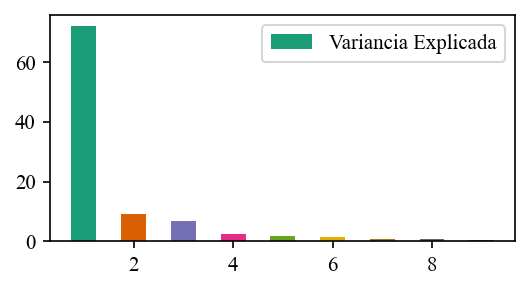

In [23]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150, gridspec_kw=None)
plt.rcParams["font.family"] = 'Times New Roman'
colors = plt.cm.Dark2(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b, estas son diferentes paletas de colores
ve_pc=df_variancia_explicada.drop(0, axis=0)
x = ve_pc.index
altura = ve_pc['Variancia Explicada']
ax.bar(x=x, height=altura*100, width=0.5, color=colors, label='Variancia Explicada')
ax.legend(loc='best', fontsize=10);

In [24]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
colormap = {'CR': 'red', 'VR': 'green'}
colors = [colormap[x] for x in datos_pca1['Muestra']]
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='PCA', plot_width=600, plot_height=400,
           x_axis_label='PCA 1', y_axis_label='PCA 2', toolbar_location="above", tools=TOOLS)

p.circle(datos_pca1[0], datos_pca1[1], color=colors, line_width=2, legend_label='colormap', 
         size=10, alpha=0.6)
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...